# SNR su low-pass a diverse frequenze del lock-in

[FOGLIO DI LAVORO EXCEL](https://unimibit-my.sharepoint.com/personal/g_fracasso2_campus_unimib_it/_layouts/15/guestaccess.aspx?share=Eb67kDSYpslCpRUZ2Tgg-tYBs5W_hCoCteq2ypSsnMiRcw&e=RWR5ri) 

---

#### Riporto commento dal foglio Excel

Cambio blades a 1 kHz

---

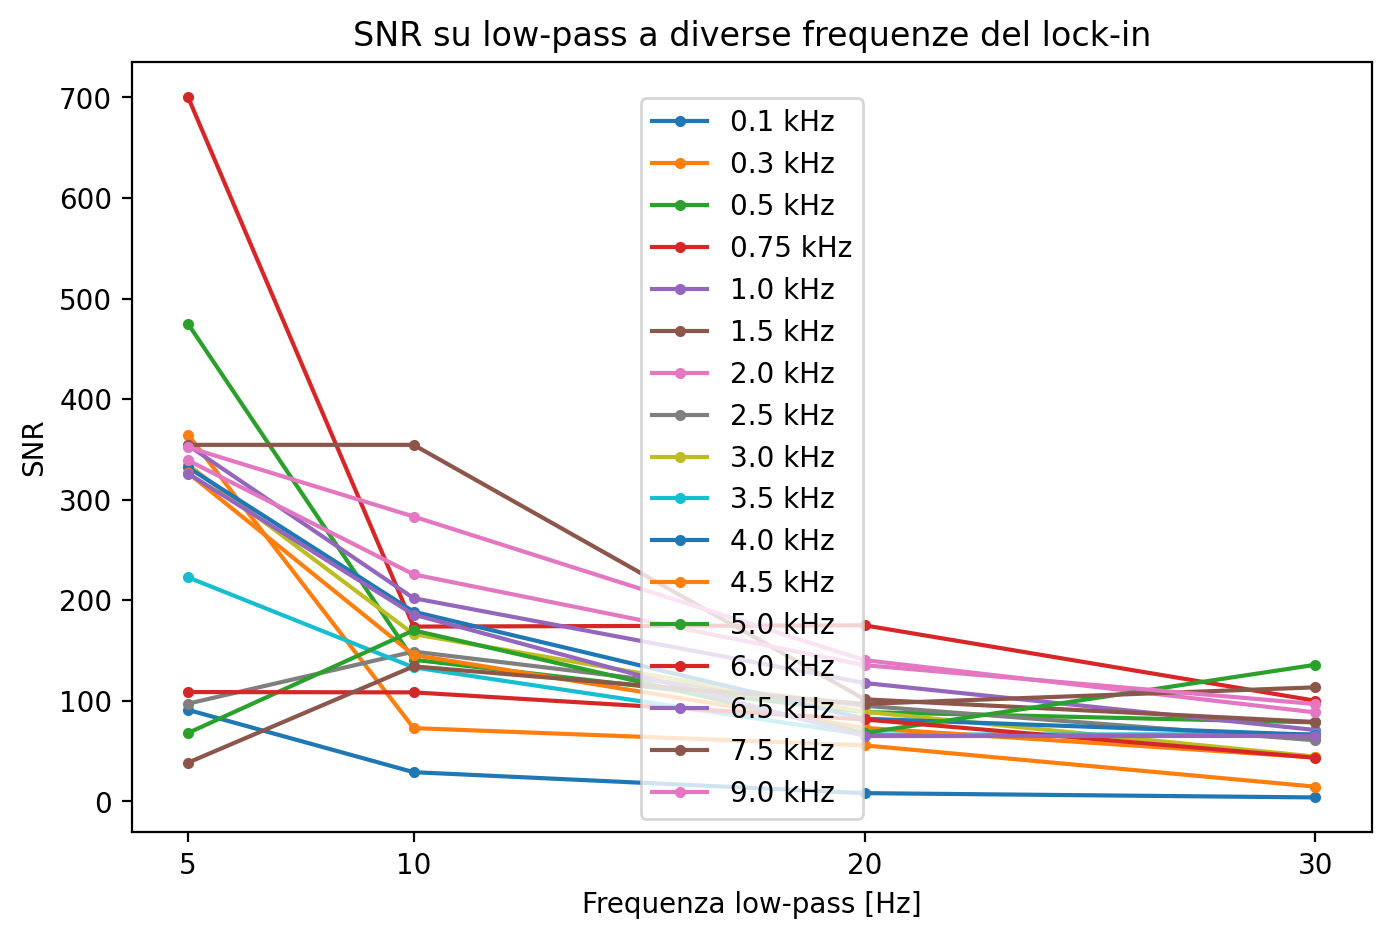

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Legge il file ignorando la prima riga (intestazione)
dati = np.loadtxt("data/snr_lock_in.csv", skiprows=1)
num_colonne = dati.shape[1]

# le successive colonne sono i valori SNR a frequenza chopper fissa
y = [dati[:,i] for i in range(1, num_colonne)] # dalla seconda all'ultima: SNR 
# le frequenze del chopper vengono messe ad etichetta
low_pass = [5, 10, 20, 30]
x = low_pass # Prima colonna: frequenza low-pass filter
intestazione = np.loadtxt("data/snr_lock_in.csv", max_rows=1) 
lock_in = [100, 300, 500, 750, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 6000, 6500, 7500, 9000]
lock_in = np.array(lock_in) / 1000

N_lock_in  = len(lock_in)
N_low_pass = len(low_pass)

# Plot
plt.figure(figsize=(8, 5), dpi=200)
for i in range(N_lock_in):
    plt.plot(x, y[i], marker='o', label=f"{lock_in[i]} kHz", linestyle='-', markersize=3)
plt.xlabel("Frequenza low-pass [Hz]")
plt.xticks(x, low_pass)
plt.ylabel("SNR")
plt.title("SNR su low-pass a diverse frequenze del lock-in")
#plt.grid(linestyle='--')
plt.legend()
plt.show()

In [30]:
y

[array([90.875     , 28.96      ,  8.11111111,  3.83157895]),
 array([364.5       ,  72.8       ,  55.61538462,  14.54      ]),
 array([474.6666667 , 140.8       ,  88.75      ,  78.44444444]),
 array([700.  , 173.75, 175.  , 100.  ]),
 array([354.       , 202.       , 117.6666667,  70.9      ]),
 array([354.5       , 354.5       , 101.4285714 ,  78.88888889]),
 array([352.   , 283.2  , 140.4  ,  88.375]),
 array([ 97.14285714, 148.8888889 ,  95.        ,  60.72727273]),
 array([334.5       , 166.25      ,  89.06666667,  44.46666667]),
 array([222.6666667, 133.2      ,  66.3      ,  66.6      ]),
 array([332.       , 188.5714286,  82.125    ,  66.1      ]),
 array([326.5      , 145.5555556,  73.       ,  43.6      ]),
 array([ 68. , 170. ,  67.9, 135.8]),
 array([108.6666667 , 108.3333333 ,  81.375     ,  43.26666667]),
 array([326.       , 185.7142857,  64.9      ,  65.       ]),
 array([ 38.5       , 134.2       ,  96.85714286, 113.3333333 ])]

A 10 Hz di low pass stiamo tagliando la maggior parte del rumore, senza tagliare troppo segnale. 

- sotto tagli troppo segnale
- sopra tagli poco rumore

# SNR su frequenze del lock-in a diverse freq. low-pass 

In [34]:
x2

array([0.3 , 0.5 , 0.75, 1.  , 1.5 , 2.  , 2.5 , 3.  , 3.5 , 4.  , 4.5 ,
       5.  , 6.  , 6.5 , 7.5 , 9.  ])

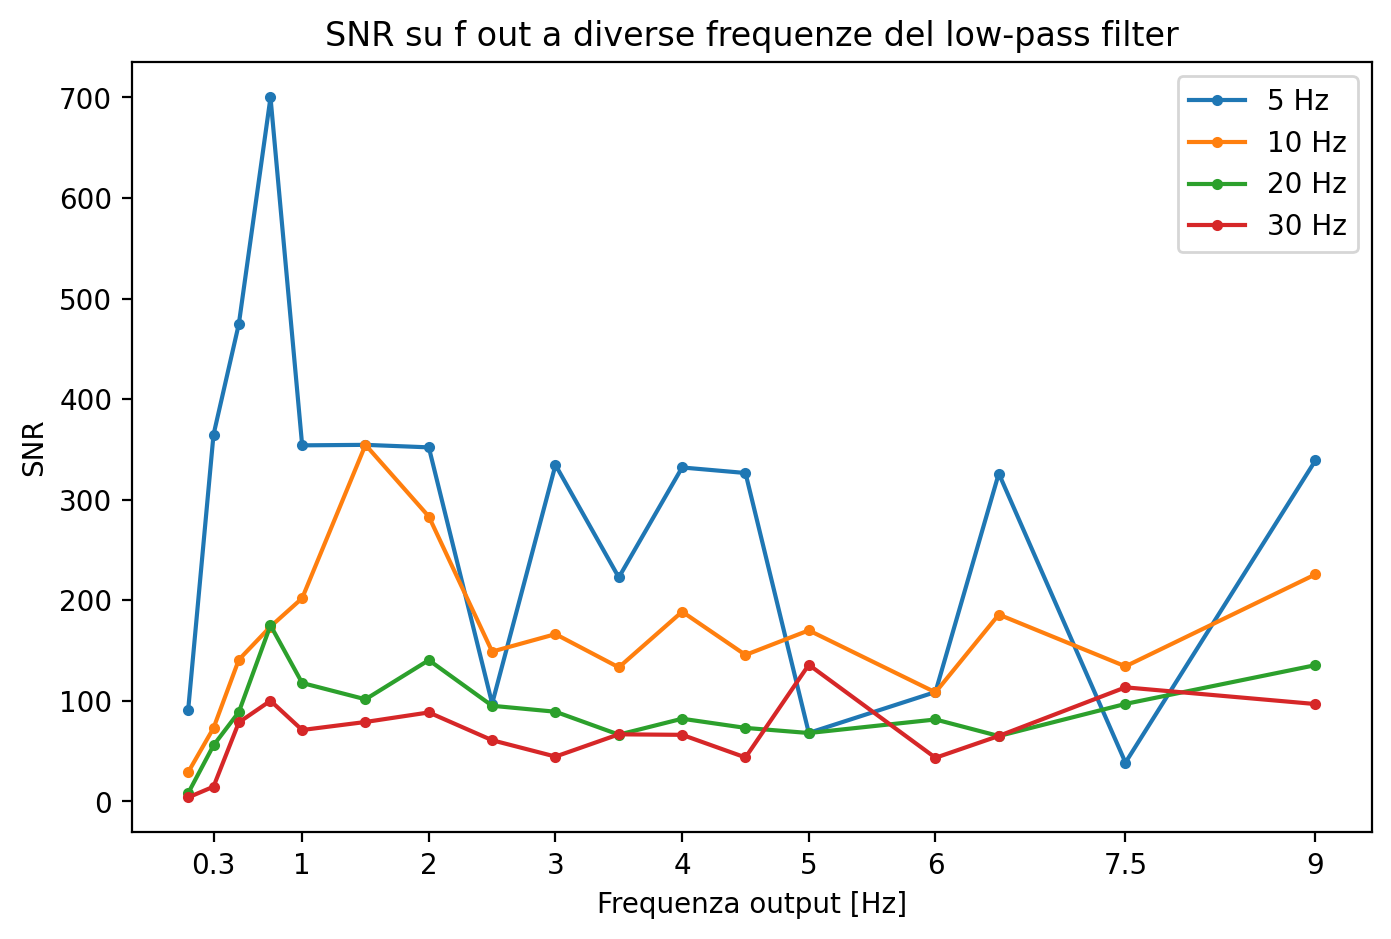

In [40]:
x2 = np.array(lock_in)
y2 = []
for j in range(N_low_pass):
    help = []
    for i in range(N_lock_in):
        help.append(y[i][j])
    y2.append(help)


x2_ticks = [0.3, 1, 2, 3, 4, 5, 6, 7.5, 9]


# Plot
plt.figure(figsize=(8, 5), dpi=200)
for i in range(N_low_pass):
    plt.plot(x2, y2[i], marker='o', label=f"{low_pass[i]} Hz", linestyle='-', markersize=3)
plt.xlabel("Frequenza output [Hz]")
#plt.xscale('log')
plt.xticks(x2_ticks, x2_ticks)
plt.ylabel("SNR")
plt.title("SNR su f out a diverse frequenze del low-pass filter")
#plt.grid(linestyle='--')
plt.legend()
plt.show()

25 marzo
L'obiettivo ora è misurare più frequenze di output, mantenendo il low-pass attorno all'ottimo che abbiamo osservato (10 Hz). In questo modo possiamo estrapolare il **tempo di rilassamento** del sistema.

Tempo di rilassamento: il chopper è come se mettesse il segnale su On/OFF periodicamente. QUando il segnale va OFF il sistema rilassa, quando torna ON viene nuovamente eccitato. Se torna ON troppo in fretta il sistema non fa in tempo a rilassarsi e quindi non c'è niente da eccitare, risultato: il segnale diminuisce.

In [33]:
y2

[[np.float64(90.875),
  np.float64(364.5),
  np.float64(474.6666667),
  np.float64(700.0),
  np.float64(354.0),
  np.float64(354.5),
  np.float64(352.0),
  np.float64(97.14285714),
  np.float64(334.5),
  np.float64(222.6666667),
  np.float64(332.0),
  np.float64(326.5),
  np.float64(68.0),
  np.float64(108.6666667),
  np.float64(326.0),
  np.float64(38.5)],
 [np.float64(28.96),
  np.float64(72.8),
  np.float64(140.8),
  np.float64(173.75),
  np.float64(202.0),
  np.float64(354.5),
  np.float64(283.2),
  np.float64(148.8888889),
  np.float64(166.25),
  np.float64(133.2),
  np.float64(188.5714286),
  np.float64(145.5555556),
  np.float64(170.0),
  np.float64(108.3333333),
  np.float64(185.7142857),
  np.float64(134.2)],
 [np.float64(8.111111111),
  np.float64(55.61538462),
  np.float64(88.75),
  np.float64(175.0),
  np.float64(117.6666667),
  np.float64(101.4285714),
  np.float64(140.4),
  np.float64(95.0),
  np.float64(89.06666667),
  np.float64(66.3),
  np.float64(82.125),
  np.float64

Blades interne: 20Hz-1kHz
Blades esterne: 